In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
x = np.arange(-100000,100000,0.1)
x.round(2)

array([-100000. ,  -99999.9,  -99999.8, ...,   99999.7,   99999.8,
         99999.9])

In [6]:
y = np.sin(x)
y

array([-0.0357488 , -0.13533981, -0.23357854, ...,  0.32947245,
        0.23356723,  0.13532827])

In [7]:
def differentiate(x, y):
    dy_dx = np.gradient(y, x)
    return dy_dx

differentiate(x, y)

array([-0.99591009, -0.98914873, -0.97071818, ..., -0.94259237,
       -0.9707209 , -0.98238953])

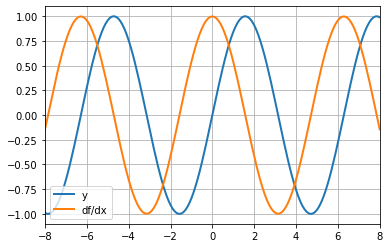

In [8]:
dy_dx = np.gradient(y, x)
plt.plot(x, y, label='y', lw=2)
plt.plot(x, dy_dx, label='df/dx', lw=2)

plt.grid()
plt.xlim([-8,8])
plt.legend(loc="lower left")

In [9]:
def n_th_ord_derivative_vis(n, y):
    c = 0
    y_n_x = y
    fig, axes = plt.subplots(n+1, figsize=(3*n+2,3*n+16))
    ax = axes[0]
    ax.plot(x,y, color='black', lw =2, ms=3, label='function')

    ax.set_ylim([-1.2, 1.2])   
    ax.set_xlim([-6, 6])   
    ax.grid()
    ax.legend()

    while c < n:        
        y_n_x = differentiate(x, y_n_x)
        
        ax = axes[c+1]
        ax.plot(x, y_n_x, color='black', lw=2, ms=3, label=f"{c+1} derivative")    
        
        ax.set_ylim([-1.2, 1.2])   
        ax.set_xlim([-6, 6])    
        ax.grid()
        ax.legend()

        print(c)
        c += 1
        
    return y_n_x

In [10]:
def n_th_ord_derivative(n, y):
    c = 0
    y_n_x = y

    while c < n:        
        y_n_x = differentiate(x, y_n_x)
        
        c += 1
        
    return y_n_x

0
1
2
3


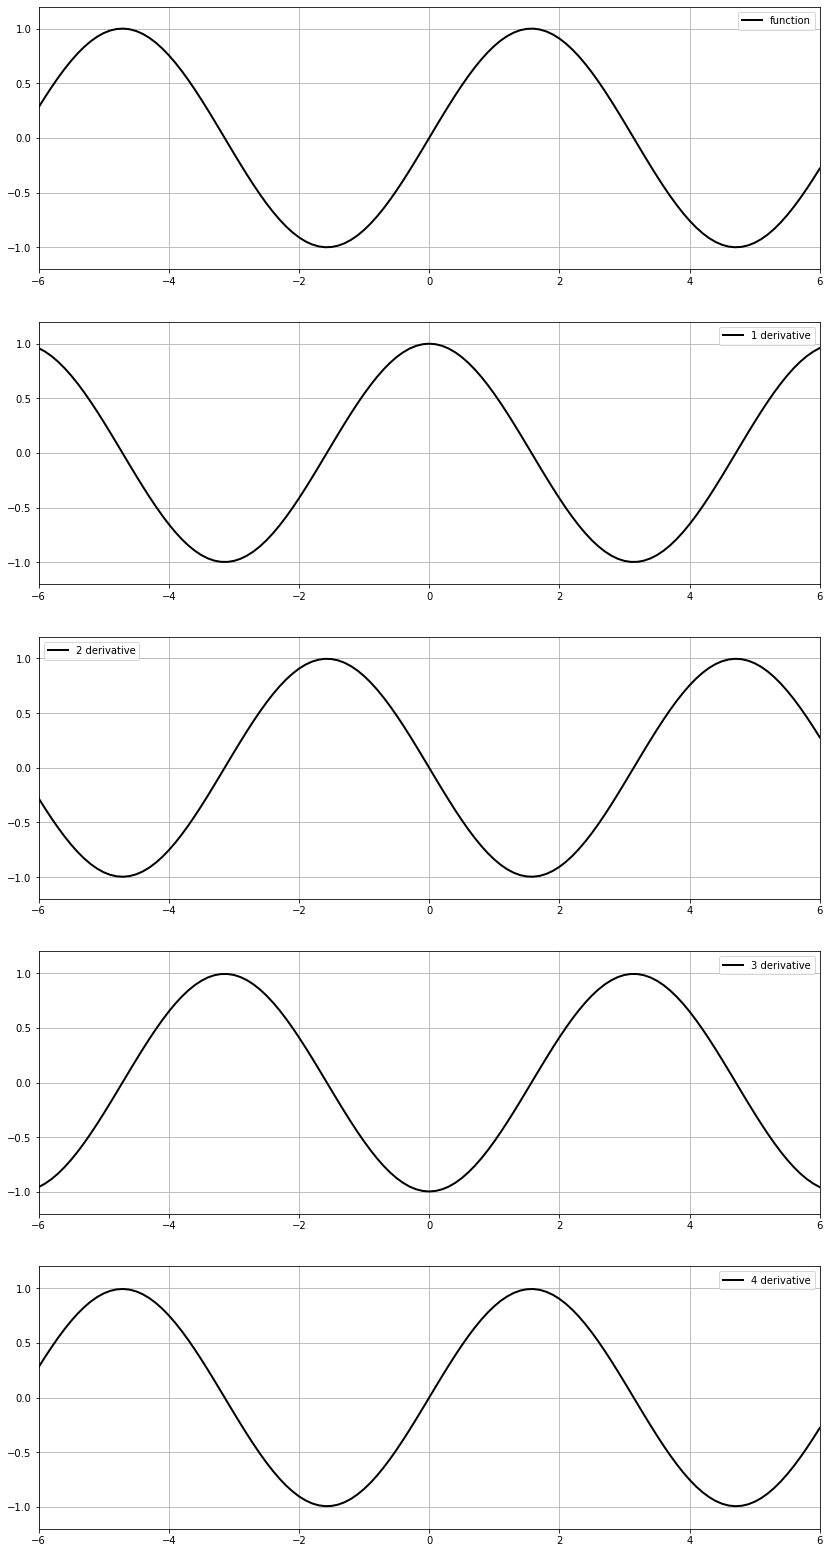

In [11]:
y_n_x = n_th_ord_derivative_vis(4, y)

In [12]:
def index(char, iterable):
    c = 0
    for i in iterable:
        if i.round(4) == char:
            return c
        c += 1

def y_x_0(x_0,x ,y):
    i = index(x_0, x)
    return y[i]

x_0 = np.array([np.pi/2]).round(4)
print(y_x_0(x_0[0], x, y))

[[-0.0357488  -0.13533981 -0.23357854 ...  0.32947245  0.23356723
   0.13532827]]


In [13]:
def factorial(n):
    fact = 1
    
    for i in range(1,n+1):
        fact = fact * i
    return fact
    
factorial(1)

1

In [14]:


def taylor_app(n, a):
    y_app = np.zeros(x.shape)

    for i in range(0, n):
        y_app = y_app + (y_x_0(a, x, n_th_ord_derivative(i, y))*((x-a)**i))/factorial(i)
    return y_app

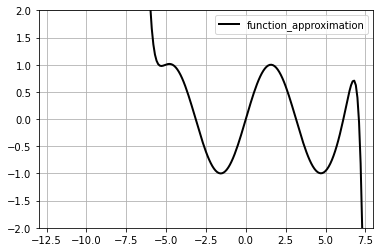

In [15]:
y_app = taylor_app(22, a=0)

plt.plot(x,y_app, color='black', lw =2, ms=3, label='function_approximation')

plt.ylim([-2, 2])   
plt.xlim([-13, 8])   
plt.grid()
plt.legend()